In [6]:
import pandas as pd
# Loading the dataset
df = pd.read_csv("owid-covid-data.csv")


In [7]:
# Check columns
print(df.columns)


Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [8]:
# Preview data
print(df.head())


   iso_code continent        location last_updated_date  total_cases  \
0       AFG      Asia     Afghanistan        2024-08-04     235214.0   
1  OWID_AFR       NaN          Africa        2024-08-04   13145380.0   
2       ALB    Europe         Albania        2024-08-04     335047.0   
3       DZA    Africa         Algeria        2024-08-04     272139.0   
4       ASM   Oceania  American Samoa        2024-08-04       8359.0   

   new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0        0.0               0.000        7998.0         0.0   
1       36.0               5.143      259117.0         0.0   
2        0.0               0.000        3605.0         0.0   
3       18.0               2.571        6881.0         0.0   
4        0.0               0.000          34.0         0.0   

   new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
0                  0.0  ...           NaN                  37.746   
1                  0.0  ...           NaN               

In [9]:
# Identifying the missing values
print(df.isnull().sum())


iso_code                                     0
continent                                   12
location                                     0
last_updated_date                            0
total_cases                                  1
                                          ... 
population                                   0
excess_mortality_cumulative_absolute       247
excess_mortality_cumulative                247
excess_mortality                           247
excess_mortality_cumulative_per_million    247
Length: 67, dtype: int64


In [11]:
# Check if the column exists
if 'date' in df.columns:
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'])
else:
    # Print available columns to help identify the correct column name
    print("Available columns:", df.columns.tolist())
    

Available columns: ['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_

In [12]:
# Drop rows with missing critical values
df.dropna(subset=['total_cases', 'total_deaths'], inplace=True)


In [16]:
# Handle missing numeric values
df.fillna(method='ffill', inplace=True)


['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hund

<Figure size 1200x600 with 0 Axes>

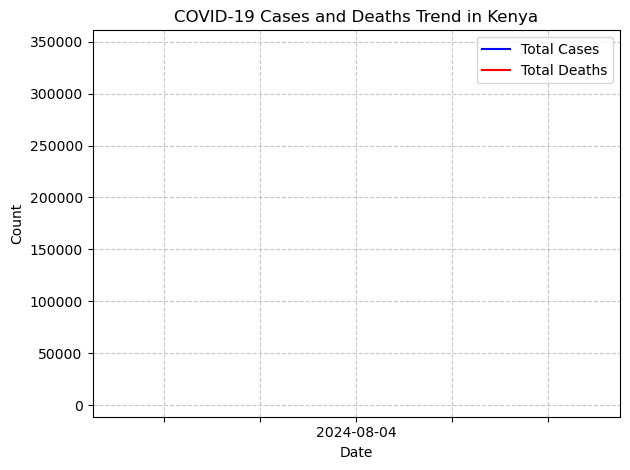

In [28]:
# Line chart for cases and deaths over time
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Print columns to verify available data
print(df.columns.tolist())

# Line chart for cases and deaths over time in Kenya
plt.figure(figsize=(12, 6))
kenya_data = df[df['location'] == 'Kenya']

# Plot both cases and deaths on the same chart
ax = kenya_data.plot(x='last_updated_date', y='total_cases', kind='line', label='Total Cases', color='blue')
kenya_data.plot(x='last_updated_date', y='total_deaths', kind='line', label='Total Deaths', color='red', ax=ax)

plt.title("COVID-19 Cases and Deaths Trend in Kenya")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

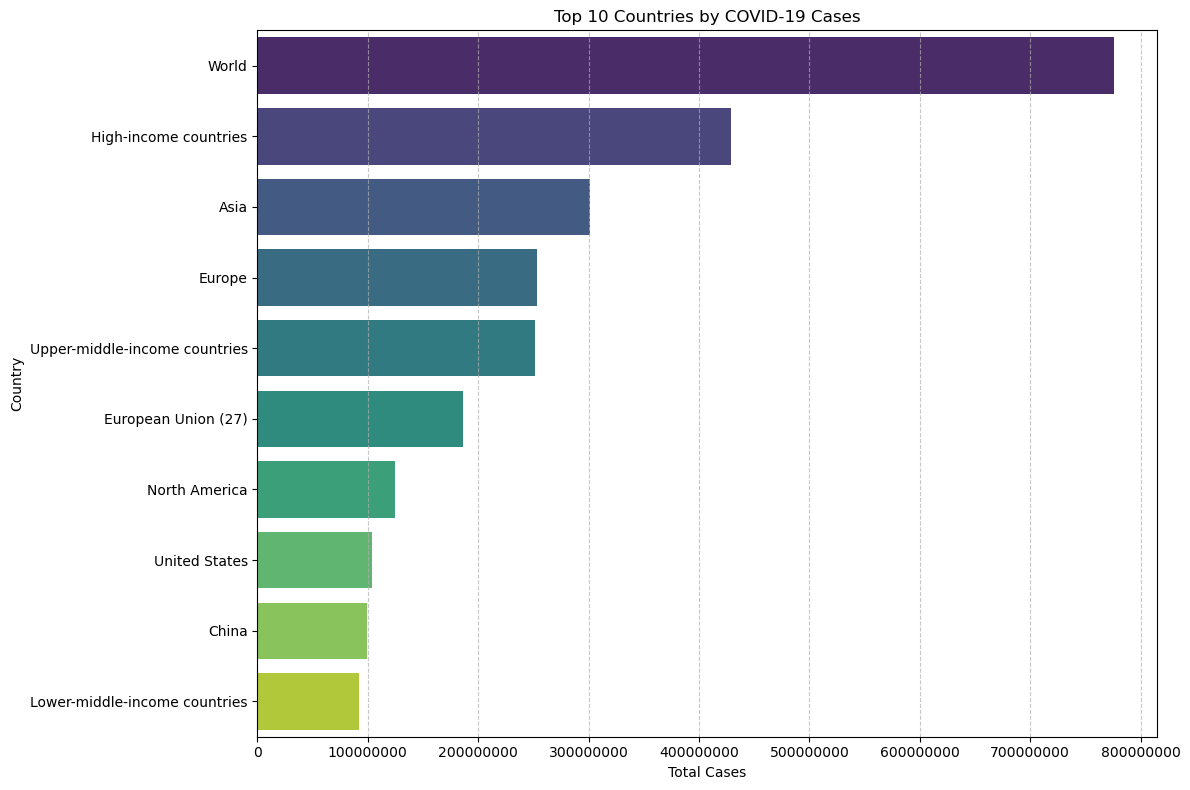

In [29]:
# Bar chart for top affected countries
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the latest data for each country
latest_data = df.sort_values('last_updated_date').groupby('location').last().reset_index()

# Sort countries by total cases and get top 10
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

# Create bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='total_cases', y='location', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.ticklabel_format(style='plain', axis='x')  # Prevent scientific notation
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

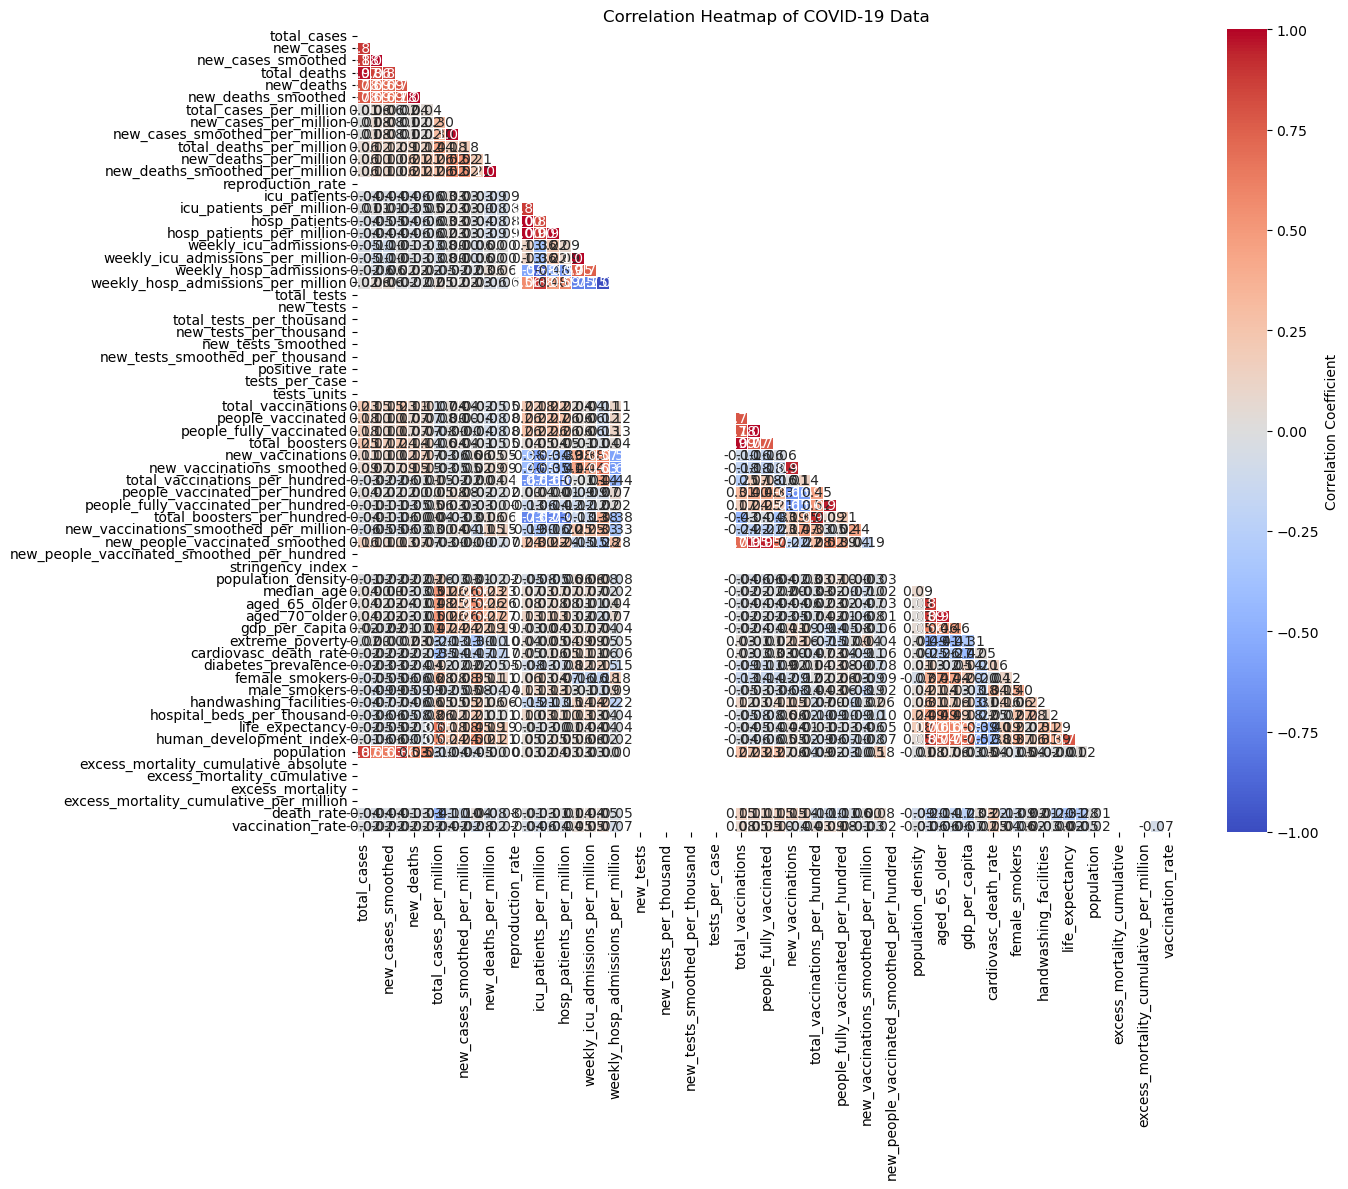

In [30]:
# Heatmap for correlations
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_data = df[numeric_columns]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(correlation_matrix)  # Create mask for upper triangle
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            mask=mask,            # Apply mask to show only lower triangle
            linewidths=0.5,       # Width of lines between cells
            fmt='.2f',            # Format for correlation values
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of COVID-19 Data')
plt.tight_layout()
plt.show()

In [34]:
!jupyter nbconvert --to pdf covid-project.ipynb


[NbConvertApp] Converting notebook covid-project.ipynb to pdf
[NbConvertApp] Support files will be in covid-project_files/
[NbConvertApp] Making directory ./covid-project_files
[NbConvertApp] Making directory ./covid-project_files
[NbConvertApp] Making directory ./covid-project_files
[NbConvertApp] Writing 43369 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 699583 bytes to covid-project.pdf
